In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import numpy as np
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
molclr = pd.read_csv("../../03_classification/molclr_regression_res.csv")
molclr_grouped = molclr[molclr["name"] == "Lipo"].groupby(["num_size"]).agg(["mean", "std", sem])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_56454/3462460227.py:3: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  molclr[molclr["name"] == "Lipo"].groupby(["num_size"]).agg(["mean", "std", sem])


In [4]:
all_res = glob("out/**/*.pkl")

In [5]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [6]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [8]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [9]:
compiled_grouped_res

mae                           max_error  \
                                     mean       std count       sem      mean   
representation num_train_points                                                 
inchi          10                1.670480  0.328890     2       NaN  4.310000   
               50                1.199227  0.110644     6       NaN  4.278333   
               100               1.097874  0.071449     7  0.027005  4.185714   
               200               1.088740  0.085700     6       NaN  4.335000   
               500               0.989760  0.071284     5       NaN  4.046000   
               1000              0.930200  0.018441     2  0.013040  3.625000   
iupac_name     10                1.544539  0.455850     3  0.263185  4.533333   
               50                1.229347  0.162735     3  0.093955  4.446667   
               100               1.147720  0.141591     2  0.100120  4.115000   
               200               1.175080  0.094526     2  0.066840  4.175000   
               500               0.940060  0.052807     2  0.037340  4.085000   
               1000              0.917440       NaN     1       NaN  3.980000   
selfies        10                1.292360  0.511541     4       NaN  3.982500   
               50                1.210776  0.124083     5  0.055492  4.470000   
               100               1.064000  0.034334     4  0.017167  3.782500   
               200               1.085227  0.076175     3  0.043980  4.126667   
               500               1.016720  0.017083     4  0.008542  3.970000   
               1000              0.949480  0.011314     2  0.008000  4.215000   
smiles         10                1.156020  0.227765     6       NaN  3.861667   
               50                1.094302  0.048779     9       NaN  4.046667   
               100               1.044820  0.039692    10       NaN  4.109000   
               200               1.047107  0.085725     9  0.028575  3.870000   
               500               0.906990  0.053014     8  0.018743  3.473750   
               1000              0.905380  0.008287     2  0.005860  4.200000   

                                                                mse            \
                                      std count       sem      mean       std   
representation num_train_points                                                 
inchi          10                0.410122     2       NaN  3.943168  1.073041   
               50                0.526248     6       NaN  2.275224  0.376689   
               100               0.692552     7  0.261760  1.936694  0.281029   
               200               0.289258     6       NaN  1.973224  0.274329   
               500               0.662933     5       NaN  1.628447  0.309560   
               1000              0.247487     2  0.175000  1.422201  0.069040   
iupac_name     10                0.298719     3  0.172466  3.491500  1.647462   
               50                0.041633     3  0.024037  2.373800  0.489364   
               100               0.685894     2  0.485000  2.088212  0.625522   
               200               0.388909     2  0.275000  2.199170  0.388497   
               500               0.247487     2  0.175000  1.456819  0.144507   
               1000                   NaN     1       NaN  1.422724       NaN   
selfies        10                0.333504     4       NaN  2.601696  1.849466   
               50                0.315436     5  0.141067  2.333628  0.404401   
               100               0.497619     4  0.248810  1.796643  0.092077   
               200               0.510523     3  0.294750  1.903955  0.310054   
               500               0.320936     4  0.160468  1.639828  0.075948   
               1000              0.190919     2  0.135000  1.467776  0.012658   
smiles         10                0.351535     6       NaN  2.089709  0.872849   
               50                0.458857     9       NaN  1.920380 

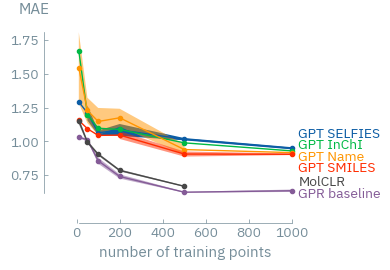

In [12]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    - compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    + compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
)

ax.plot(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
    label="GPT InChI",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    - compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    + compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
)

ax.plot(
    compiled_grouped_res.loc["iupac_name", :].index,
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"],
    label="GPT Name",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["iupac_name", :].index,
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
    - compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"],
    compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
    + compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_grouped_res.loc["smiles", :].index,
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["smiles", :].index,
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
    - compiled_grouped_res.loc["smiles", :]["mae"]["sem"],
    compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
    + compiled_grouped_res.loc["smiles", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    molclr_grouped.loc[:].index,
    molclr_grouped.loc[:]["mae"]["mean"],
    label="MolCLR",
    marker="o",
)

ax.fill_between(
    molclr_grouped.loc[:].index,
    molclr_grouped.loc[:]["mae"]["mean"] - molclr_grouped.loc[:]["mae"]["sem"],
    molclr_grouped.loc[:]["mae"]["mean"] + molclr_grouped.loc[:]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE", y_pad=-0.1)
# ax.set_xscale('log')

range_frame(
    ax,
    compiled_gpr_grouped.loc[:].index,
    np.array(
        [
            np.max(
                compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
                + compiled_grouped_res.loc["iupac_name", :]["mae"]["sem"]
            ),
            np.min(
                compiled_gpr_grouped.loc[:]["mae"]["mean"]
                - compiled_gpr_grouped.loc[:]["mae"]["sem"]
            ),
        ]
    ),
)

fig.savefig("lipophilicity_regression_res.pdf", bbox_inches="tight")